## Predicting with ANN

### Get the dataset

In [7]:
import pandas as pd
from dateutil import parser, rrule
import numpy as np
import getDegrees_Y 
import numpy as np
np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)


start_date = "2005-06-01"
end_date = "2012-12-1"

temperatures = pd.read_csv("Chennai_temperature_data.csv")
Y_keys = temperatures.keys()
#print(pd.DataFrame(Y_keys))
planet_data = pd.read_csv("Chennai_PP_data.csv")

dates_string = getDegrees_Y.getDateString(start_date,end_date)
ret = getDegrees_Y.getDegrees_Y(dates_string,temperatures,planet_data,6)
print(len(ret["X"]),len(ret["Y"]))

2741 2741


In [5]:
print(pd.DataFrame(ret["X_keys"]))
pd.DataFrame(ret["X"][:5])

                        0
0   Ascendant (As)_Degree
1     Jupiter (Ju)_Degree
2        Ketu (Ke)_Degree
3        Mars (Ma)_Degree
4     Mercury (Me)_Degree
5        Moon (Mo)_Degree
6     Neptune (Ne)_Degree
7        Rahu (Ra)_Degree
8      Saturn (Sa)_Degree
9         Sun (Su)_Degree
10       True Ketu_Degree
11       True Rahu_Degree
12     Uranus (Ur)_Degree
13      Venus (Ve)_Degree


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,133.92,165.02,176.37,328.45,44.31,339.65,293.62,356.37,90.62,46.93,177.81,357.81,316.75,63.17
1,134.78,165.01,176.32,329.15,46.5,353.02,293.62,356.32,90.73,47.89,177.82,357.82,316.76,64.39
2,135.64,165,176.27,329.86,48.7,6.16,293.61,356.27,90.84,48.84,177.82,357.82,316.77,65.61
3,136.5,164.99,176.21,330.57,50.91,19.08,293.6,356.21,90.95,49.8,177.78,357.78,316.78,66.84
4,137.36,164.99,176.16,331.27,53.11,31.81,293.59,356.16,91.05,50.76,177.71,357.71,316.79,68.06


### Keep high freq planets

In [11]:
X_d = ret["X"][:,[3,4,5,9,13]]#Keep mars,mercury,moon,sun,venus

### Scale the features

In [31]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_tr = sc_X.fit_transform(X_d)

#sc_Y = StandardScaler()
#y_tr = sc_Y.fit_transform(ret["Y"][:,-1].reshape(-1,1))

y_tr = ret["Y"][:,-1].reshape(-1,1)

X_tr.shape
y_tr.shape

/usr/local/lib/python3.4/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


(2741, 1)

### Build ANN Regressor

In [32]:
from keras.models import Sequential
from keras.layers import Dense

regressor = Sequential()
## 2 hidden layers with 5 nodes each
regressor.add(Dense(units=5,kernel_initializer='uniform',activation='relu',input_shape=(5,)))
regressor.add(Dense(units=5,kernel_initializer='uniform',activation='relu'))
regressor.add(Dense(units=5,kernel_initializer='uniform',activation='relu'))

## Output layer 
regressor.add(Dense(units=1,kernel_initializer='uniform',activation=None))

print(regressor.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_18 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_19 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 6         
Total params: 96
Trainable params: 96
Non-trainable params: 0
_________________________________________________________________
None


In [33]:
regressor.compile(optimizer='adam',loss='mean_squared_error')

In [34]:
regressor.fit(X_tr,y_tr,batch_size=10,epochs=50)

Epoch 1/50
2741/2741 [==============================] - 1s 227us/step - loss: 784.3868
Epoch 2/50
2741/2741 [==============================] - 0s 165us/step - loss: 215.1241
Epoch 3/50
2741/2741 [==============================] - 0s 163us/step - loss: 14.6355
Epoch 4/50
2741/2741 [==============================] - 0s 166us/step - loss: 7.7823
Epoch 5/50
2741/2741 [==============================] - 0s 165us/step - loss: 5.3988
Epoch 6/50
2741/2741 [==============================] - 0s 164us/step - loss: 4.1801
Epoch 7/50
2741/2741 [==============================] - 0s 165us/step - loss: 3.4685
Epoch 8/50
2741/2741 [==============================] - 0s 166us/step - loss: 3.0105
Epoch 9/50
2741/2741 [==============================] - 0s 166us/step - loss: 2.7925
Epoch 10/50
2741/2741 [==============================] - 0s 176us/step - loss: 2.6568
Epoch 11/50
2741/2741 [==============================] - 0s 169us/step - loss: 2.5906
Epoch 12/50
2741/2741 [==============================] - 0

1431 1431


/usr/local/lib/python3.4/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


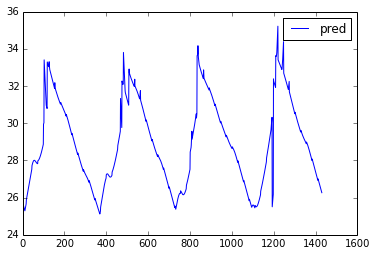

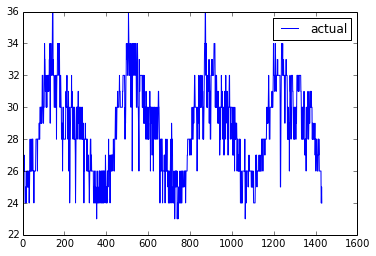

In [35]:
start_date = "2013-01-01"
end_date = "2016-12-1"
dates_string = getDegrees_Y.getDateString(start_date,end_date)
ret1 = getDegrees_Y.getDegrees_Y(dates_string,temperatures,planet_data,6)
print(len(ret1["X"]),len(ret1["Y"]))

X_td = ret1["X"][:,[3,4,5,9,13]]
X_test = sc_X.transform(X_td)
y_pred = regressor.predict(X_test)
%matplotlib inline 
#Needed to inline graphs
import matplotlib.pyplot as plt

plt.plot(y_pred,label="pred")
plt.legend()
plt.show()
plt.plot(ret1["Y"][:,-1],label="actual")
plt.legend()
plt.show()

In [36]:
regressor.evaluate(X_test,ret1["Y"][:,-1].reshape(-1,1))

1431/1431 [==============================] - 0s 48us/step


2.6792488744590433

### Consolidated code

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_43 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_44 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_45 (Dense)             (None, 1)                 6         
Total params: 96
Trainable params: 96
Non-trainable params: 0
_________________________________________________________________
None
Training data : 1645 1645
Epoch 1/50
1645/1645 [==============================] - 0s 297us/step - loss: 521.1741
Epoch 2/50
1645/1645 [==============================] - 0s 168us/step - loss: 132.0799
Epoch 3/50
1645/1645 [==============================] - 0s 167us/step - l

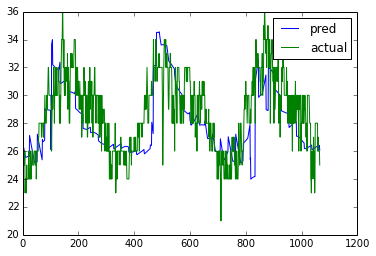

In [45]:
import pandas as pd
from dateutil import parser, rrule
import numpy as np
import getDegrees_Y 
import numpy as np
from keras.models import Sequential 
from keras.layers import Dense


def train(temperatures,planet_data,start_date,end_date,x_index,y_index,fs,regressor,bs,eph):

    dates_string = getDegrees_Y.getDateString(start_date,end_date)
    ret = getDegrees_Y.getDegrees_Y(dates_string,temperatures,planet_data,y_index)
    print("Training data :", len(ret["X"]),len(ret["Y"]))

    X_d = ret["X"][:,x_index]

    ##Feature Scaling
    from sklearn.preprocessing import StandardScaler

    ## Scaling for output is not necessary
    if fs:
       sc_X = StandardScaler()
       X_tr = sc_X.fit_transform(X_d)
       y_tr = ret["Y"][:,-1].reshape(-1,1)
    else:
        X_tr = X_d
        y_tr = ret["Y"][:,-1].reshape(-1,1)
        sc_X = None
        sc_Y = None
    
    regressor.fit(X_tr,y_tr,batch_size=bs,epochs=eph)
    
    return {"reg":regressor,"X_tr":sc_X}

def train_test(indep_var_idx,dep_var_idx,feature_scaling,tr_start,tr_end,test_start,test_end,regressor,batch_size,epochs):

   temperatures = pd.read_csv("Chennai_temperature_data.csv")
   planet_data = pd.read_csv("Chennai_PP_data.csv")
    
   ##Training
   reg = train(temperatures,planet_data,tr_start,tr_end,indep_var_idx,dep_var_idx,feature_scaling,regressor,batch_size,epochs)

   ##Testing
   dates_string = getDegrees_Y.getDateString(test_start,test_end)
   ret1 = getDegrees_Y.getDegrees_Y(dates_string,temperatures,planet_data,dep_var_idx)
   print("Test data ", len(ret1["X"]),len(ret1["Y"]))

   X_td = ret1["X"][:,indep_var_idx]

   if feature_scaling:
      X_test = reg["X_tr"].transform(X_td)
   else:
      X_test = X_td

   y_pred = reg["reg"].predict(X_test)

   ##Visualize
   %matplotlib inline 
   #Needed to inline graphs
   import matplotlib.pyplot as plt

   plt.plot(y_pred,label="pred")

   plt.plot(ret1["Y"][:,-1],label="actual")
   plt.legend()
   
   print("MSE : ", regressor.evaluate(X_test,ret1["Y"][:,-1].reshape(-1,1)))
    
   return plt

if __name__ == "__main__":

   indep_var_idx = [3,4,5,9,13]
   dep_var_idx = 6
   feature_scaling = False

   tr_start = "2010-06-01"
   tr_end = "2014-12-1"

   test_start = "2015-01-01"
   test_end = "2017-12-1"


   regressor = Sequential()
   ## 2 hidden layers with 5 nodes each
   regressor.add(Dense(units=5,kernel_initializer='uniform',activation='relu',input_shape=(len(indep_var_idx),)))
   regressor.add(Dense(units=5,kernel_initializer='uniform',activation='relu'))
   regressor.add(Dense(units=5,kernel_initializer='uniform',activation='relu'))

   ## Output layer 
   regressor.add(Dense(units=1,kernel_initializer='uniform',activation=None))

   print(regressor.summary())

   regressor.compile(optimizer='adam',loss='mean_squared_error')

   plt = train_test(indep_var_idx,dep_var_idx,feature_scaling,tr_start,tr_end,test_start,test_end,regressor,10,50)
   plt.show()